Given a collection of simulated error-free read-pairs (with exact distance d = 1000 between reads of length k = 120 within a read-pair), use the paired de Bruijn graph to reconstruct the Carsonella ruddii genome. Compare this assembly to the assembly obtained from the classic de Bruijn graph (i.e., when all we know is the reads themselves and do not know the distance between paired reads) in order to better appreciate the benefits of read-pairs. For each k, what is the minimum value of d needed to enable reconstruction of the entire Carsonella ruddii genome from its (k,d)-mer composition?

In [8]:
from pathlib import Path
from itertools import chain
from collections import Counter
from functools import reduce
import operator
import matplotlib.pyplot as plt
from matplotlib import get_backend, is_interactive
import assembly

backend = get_backend()
interactive = is_interactive()
print('Using backend', backend, ', interactive =', interactive)

Using backend module://ipykernel.pylab.backend_inline , interactive = True


Read the dataset from file.

In [2]:
with open(Path('challenge03_dataset.txt')) as input_file:
    lines = input_file.readlines()
    
reads = [line.rstrip().split('|') for line in lines]
del lines

Check how many gapped reads are in there, and that every read is the same length, k

In [3]:
# Total number of gapped reads (every gapped read is one pair of k-mers)
len(reads)

6774

In [4]:
# Length of every k-mer
k = len(reads[0][0])
k

120

In [5]:
# Is every read actually the same length?
all([len(kmer) == k for kmer in chain(*reads)])

True

Count and plot occurrences of each nucleotide.

In [6]:
counts = reduce(operator.add, map(Counter,chain(*reads)))

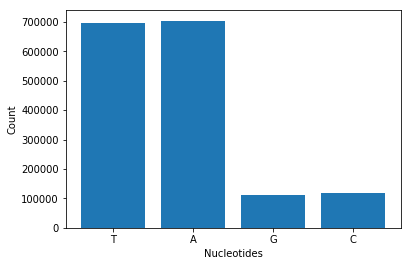

In [7]:
plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()))
plt.ylabel('Count')
plt.xlabel('Nucleotides');

In [11]:
d = 1000
genome = assembly.reconstruct_string_from_paired_reads(d, reads)

AssertionError: 